### GRIP : The Sparks Foundation (Data Science and Business Analayst Intern)

<h1 align='center'> Task 1: Prediction using Supervised ML </h1>

### By: Riya Dhama

<hr>

### Objective : Predict the percentage of an student based on the no. of study hours.

- This is a simple linear regression task as it involves just 2 variables.
- What will be predicted score if a student studies for 9.25 hrs/ day?

###  Importing all libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Inspecting Data

In [3]:
df.shape

(25, 2)

- The data has 25 rows and 2 attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- There is 1 float attribute and 1 integer
- There are no null values

In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

-  No null values in dataset

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- There is slight difference in maximum and 75% value, which indicate the presence of outlier. 

### Exploratory Data Analysis 

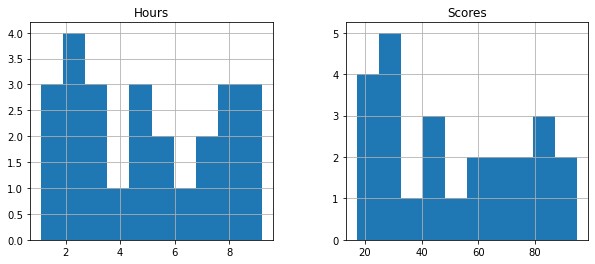

In [7]:
df.hist(figsize=(10,4));

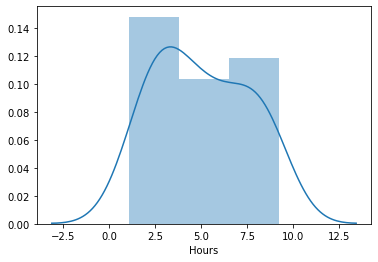

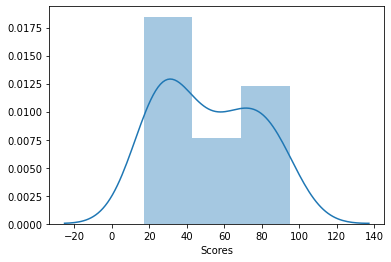

In [8]:
sns.distplot(df['Hours'])
plt.show()
sns.distplot(df['Scores'])
plt.show()

- The graphs are bimodal

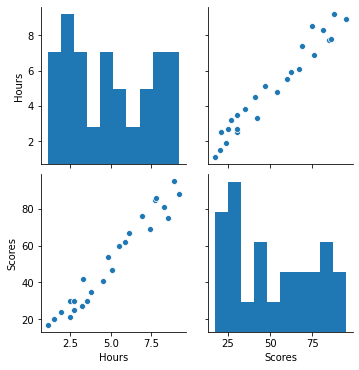

In [9]:
sns.pairplot(df);

- It seems to have linear relation between scores and hours

Let's analyse in detail 

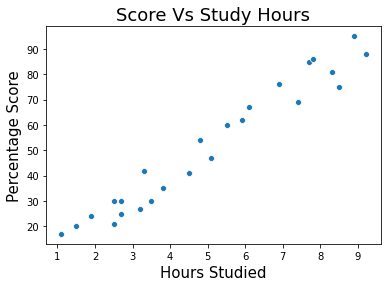

In [10]:
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Score Vs Study Hours', size=18)
plt.ylabel('Percentage Score', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

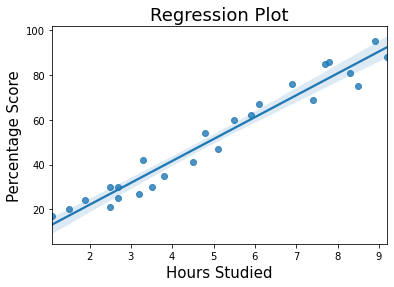

In [11]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=18)
plt.ylabel('Percentage Score', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

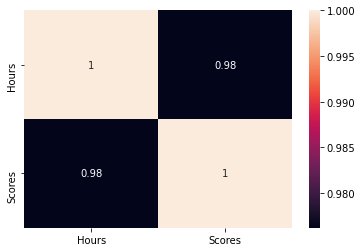

In [12]:
sns.heatmap(df.corr(), annot=True);

- It has high positive correlation 

<h2 align='center'> Train the Model using Linear Regression </h2>

### Preparing data 
- Divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Split the data into training and test sets

In [16]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training Model 

In [17]:
from sklearn.linear_model import LinearRegression  

lin = LinearRegression()  
lin.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Making Prediction 

In [18]:
y_pred = lin.predict(X_test) 

### Comparing Actual vs Predicted

In [19]:
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_output 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating The Model

In [20]:
from sklearn.metrics import mean_absolute_error  
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Visualize Result 

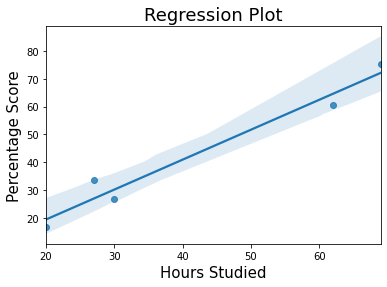

In [21]:
sns.regplot(x= y_test , y= y_pred)
plt.title('Regression Plot',size=18)
plt.ylabel('Percentage Score', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
hours = [9.25]
result = lin.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(result[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


<h2 align='center'> Thank You </h2>